In [2]:
import json 
import matplotlib
from matplotlib import patches
from matplotlib import pyplot as plt
import pickle
import pandas as pd

In [3]:
# pd.set_option('display.max_columns', 1000)  # or 1000
# pd.set_option('display.max_rows', 100000)  # or 1000
# pd.set_option('display.max_colwidth', None) 

In [4]:
data_path = '../../'
data = pd.read_csv('../../data/raw-data/everything.csv', index_col=0)

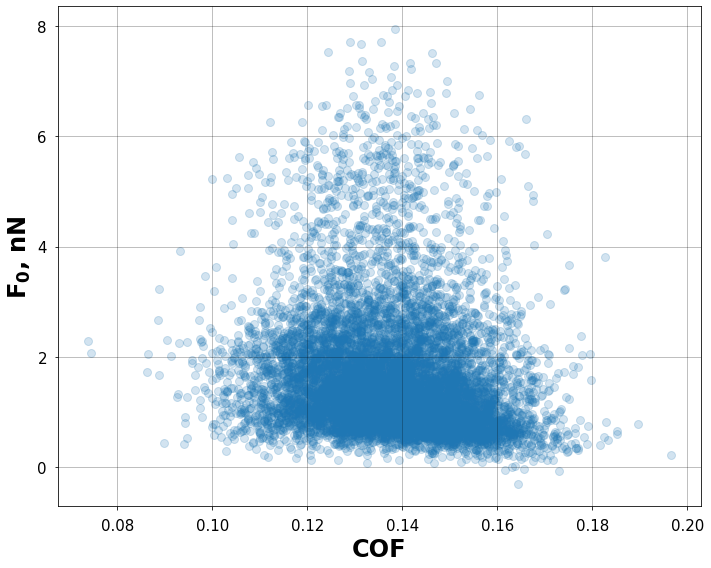

In [6]:
index = list()
cof = list()
f0 = list()
for i, row in data.iterrows():
    index.append(i)
    cof.append(row['COF'])
    f0.append(row['intercept'])
    
plt.figure(figsize=(10, 8))
alpha = 0.2 

#plt.title('F$_0$ vs COF', fontsize=20)
plt.ylabel(r'$\mathbf{F_0}$, nN', weight='bold')
plt.xlabel('COF', weight='bold')
plt.scatter(cof, f0, alpha=alpha, marker='o')
#plt.savefig(fname='./plots/dist/complete_COF_vs_F0.pdf', dpi=500)

In [7]:
len(data)

9772

In [8]:
n = 500
poi = ['terminal_group_1', 
       'terminal_group_2',
       'terminal_group_3',
       'frac-1', 'frac-2',
       'COF', 'COF-std',
       'intercept', 'intercept-std']
topCOF = data.sort_values(by='COF')[poi]
topF0 = data.sort_values(by='intercept')[poi]
optimal = pd.merge(topCOF.head(n), topF0.head(n), how='inner',
                     on=poi)
print(len(optimal))

22


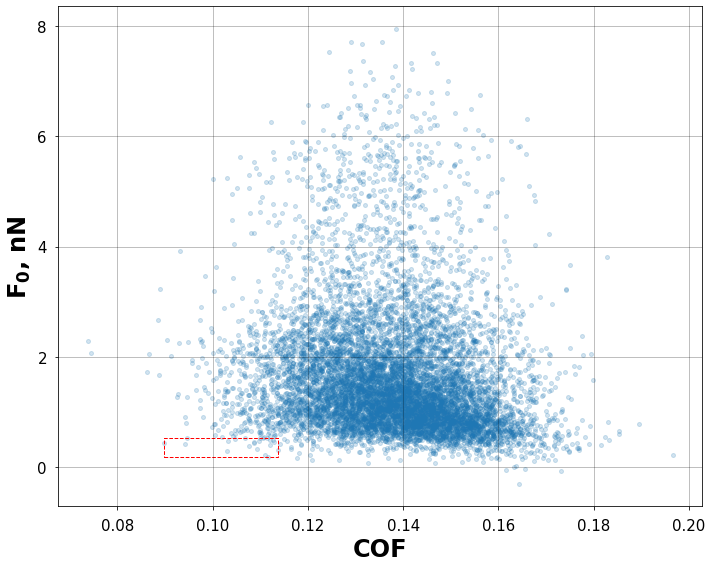

In [10]:
index = list()
cof = list()
f0 = list()
for i, row in data.iterrows():
    index.append(i)
    cof.append(row['COF'])
    f0.append(row['intercept'])
    
plt.figure(figsize=(10, 8))
alpha = 0.2 


rect = patches.Rectangle(xy=(optimal['COF'].min(), optimal['intercept'].min()),
                         width=optimal['COF'].max() - optimal['COF'].min(), 
                         height=optimal['intercept'].max() - optimal['intercept'].min(),
                         edgecolor='r',
                         linewidth=1,
                         linestyle='--',
                         facecolor='none')
#plt.title('F$_0$ vs COF', fontsize=20)
plt.gca().add_patch(rect)
plt.ylabel(r'$\mathbf{F_0}$, nN', weight='bold')
plt.xlabel('COF', weight='bold')
plt.scatter(cof, f0, alpha=alpha, marker='.')
plt.savefig(fname=f'./plots/dist/complete_COF_vs_F0(top{len(optimal)}).pdf', dpi=500)

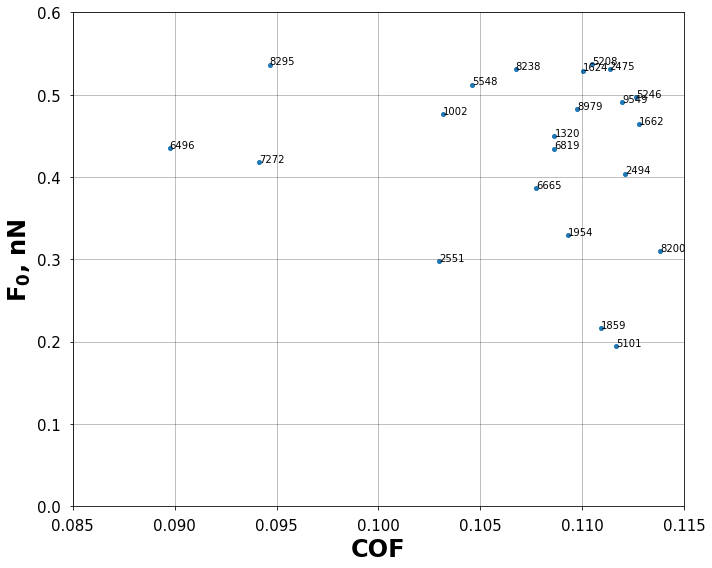

In [11]:
index = list()
cof = list()
f0 = list()
for i, row in data.iterrows():
    if row['COF'] <= optimal['COF'].max() and row['intercept'] <= optimal['intercept'].max():
        index.append(i)
        cof.append(row['COF'])
        f0.append(row['intercept'])
    
plt.figure(figsize=(10, 8))
alpha = 0.2 

#plt.title('F$_0$ vs COF', fontsize=20)
plt.ylabel(r'$\mathbf{F_0}$, nN', weight='bold')
plt.xlabel('COF', weight='bold')
plt.ylim(0, 0.6)
plt.xlim(0.085, 0.115)
plt.scatter(cof, f0, alpha=1, marker='.')

for i, txt in enumerate(index):
    plt.annotate(txt, (cof[i], f0[i]))
    
plt.savefig(fname=f'./plots/dist/zoomed_topcomplete_COF_vs_F0(top{len(optimal)}).pdf', dpi=500)

In [9]:
condensed_data = data.iloc[index]
condensed_data 


,terminal_group_1,terminal_group_2,terminal_group_3,backbone,frac-1,frac-2,COF,MR-mean,MR-min,asphericity-mean,...,vsa-hyd-mean,vsa-hyd-min,vsa-polar+-mean,vsa-polar+-min,vsa-polar--mean,vsa-polar--min,vsa-polar-mean,vsa-polar-min,COF-std,intercept-std
1002,cyano,cyano,isopropyl,alkylsilane,0.50,0.50,0.103155,15.899500,11.28700,0.695787,...,31.226250,22.295281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006298,0.107536
1320,cyclopropyl,ethylene,cyano,alkylsilane,0.50,0.50,0.108633,14.210750,11.28700,0.668241,...,27.176971,22.295281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014161,0.282005
1624,difluoromethyl,isopropyl,cyano,alkylsilane,0.50,0.50,0.110033,13.691000,11.28700,0.734642,...,24.270677,22.295281,1.600374,0.000000,2.195207,0.000000,0.137934,0.000000,0.009843,0.426130
1662,difluoromethyl,methyl,cyano,alkylsilane,0.50,0.50,0.112796,11.400000,11.28700,0.636928,...,19.713456,17.131631,1.600374,0.000000,2.195207,0.000000,0.137934,0.000000,0.003634,0.158542
1859,ethylene,isopropyl,cyano,alkylsilane,0.50,0.50,0.110918,14.739250,11.28700,0.739230,...,28.101834,22.295281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010759,0.376764
1954,ethylene,perfluoromethyl,cyano,alkylsilane,0.50,0.50,0.109304,12.543500,11.28700,0.688934,...,24.096383,22.295281,1.544075,0.000000,0.000000,0.000000,0.050940,0.000000,0.011916,0.312352
2475,isopropyl,methoxy,cyano,alkylsilane,0.50,0.50,0.111338,14.004750,11.28700,0.730099,...,26.762059,22.295281,0.000000,0.000000,1.184216,0.000000,0.043799,0.000000,0.014387,0.501880
2494,isopropyl,methyl,cyano,alkylsilane,0.50,0.50,0.112096,13.608500,11.28700,0.598074,...,26.669029,22.295281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018209,0.325228
2551,isopropyl,perfluoromethyl,cyano,alkylsilane,0.50,0.50,0.102982,13.703750,11.28700,0.645492,...,27.220799,22.295281,1.544075,0.000000,0.000000,0.000000,0.050940,0.000000,0.018057,0.195986
5101,difluoromethyl,carboxyl,isopropyl,alkylsilane,0.25,0.75,0.111651,16.706925,12.90185,0.505296,...,25.732039,11.306858,3.575376,0.000000,4.811358,0.000000,0.298518,0.000000,0.002057,0.831877


In [11]:
condensed_data = condensed_data[['terminal_group_1','terminal_group_2',
                                 'terminal_group_3', 'frac-1','frac-2',
                                 'backbone','COF','COF-std',
                                 'intercept', 'intercept-std']]
condensed_data.to_csv(f'./plots/opt_sys{len(condensed_data)}_raw.csv')

In [15]:
renamed_cdata = condensed_data.rename(columns={'terminal_group_1': 'Terminal Group A',
                       'terminal_group_2': 'Terminal Group B',
                       'terminal_group_3': 'Terminal Group C',
                       'frac-1': 'Fraction A',
                       'frac-2': 'Fraction B',
                       'backbone': 'Backbone',
                       'COF': 'COF',
                       'COF-std': 'COF-std',
                       'intercept': 'F$_0$',
                       'intercept-std': 'F$_0$-std'})
renamed_cdata.index = range(1, len(renamed_cdata)+1)


In [16]:
len(renamed_cdata)

22

In [17]:
renamed_cdata.to_csv(f'./plots/opt_sys{len(renamed_cdata)}.csv')

# Histogram - Distribution

### Everything Dataset

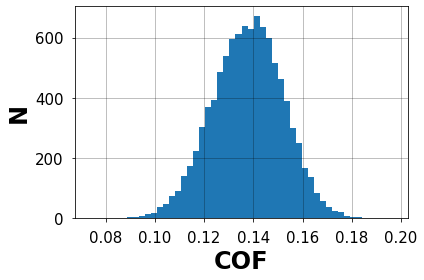

In [14]:
plt.hist(data['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
plt.savefig(fname='./plots/dist/COF_hist.pdf', dpi=500)

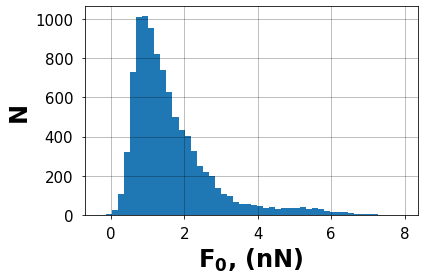

In [13]:
plt.hist(data['intercept'], bins=50)
plt.xlabel(r'$\mathbf{F_0}$, (nN)')
plt.ylabel('N')
plt.savefig(fname='./plots/dist/F0_hist.pdf', dpi=500)

### Combined Test set 

In [20]:
combined_test = pd.read_csv('../../data/splitted-data/everything/nbins-10/test_set.csv', index_col=0)


Text(0, 0.5, 'N')

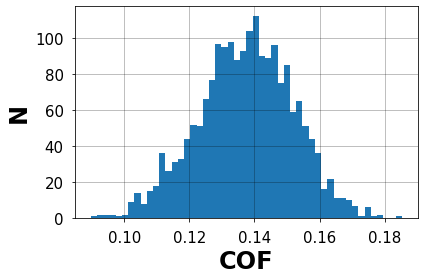

In [21]:
plt.hist(combined_test['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

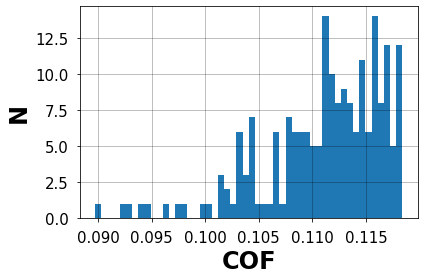

In [22]:
plt.hist(combined_test.sort_values(by='COF').head(200)['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

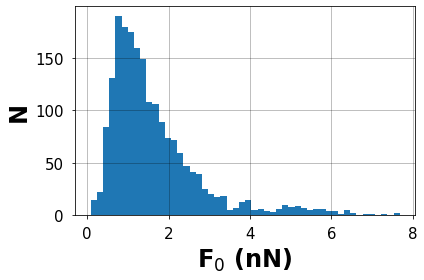

In [23]:
plt.hist(combined_test['intercept'], bins=50)
plt.xlabel('F$_0$ (nN)')
plt.ylabel('N')
#plt.savefig(fname='./plots/F0_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

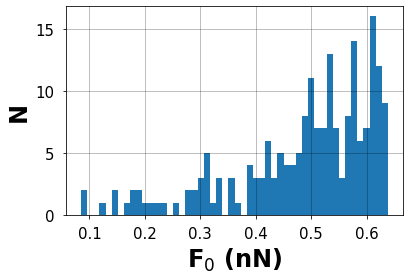

In [24]:
plt.hist(combined_test.sort_values(by='intercept').head(200)['intercept'], bins=50)
plt.xlabel('F$_0$ (nN)')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

### Mixed 50:50 Test set 

In [25]:
m5050_test = pd.read_csv('../../data/splitted-data/mixed5050/nbins-10/test_set.csv', index_col=0)


Text(0, 0.5, 'N')

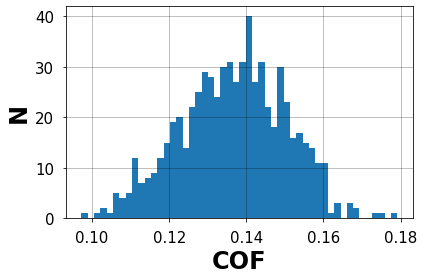

In [26]:
plt.hist(m5050_test['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

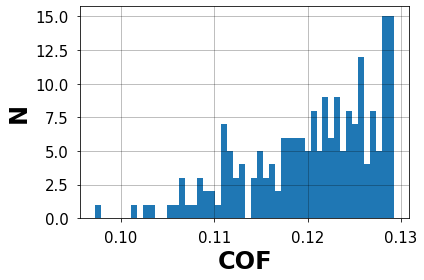

In [27]:
plt.hist(m5050_test.sort_values(by='COF').head(200)['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

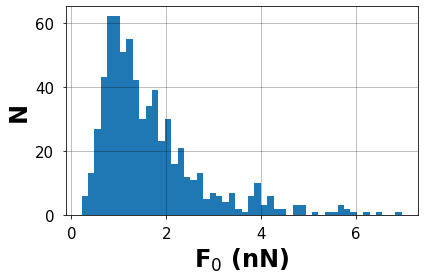

In [28]:
plt.hist(m5050_test['intercept'], bins=50)
plt.xlabel('F$_0$ (nN)')
plt.ylabel('N')
#plt.savefig(fname='./plots/F0_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

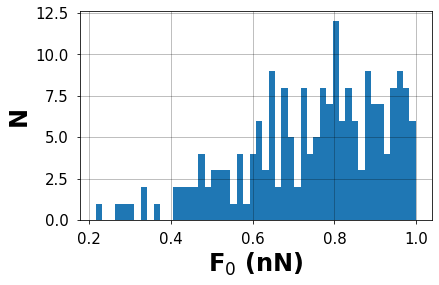

In [29]:
plt.hist(m5050_test.sort_values(by='intercept').head(200)['intercept'], bins=50)
plt.xlabel('F$_0$ (nN)')
plt.ylabel('N')
#plt.savefig(fname='./plots/F0_hist.pdf', dpi=500)

### Mixed 25:75 Test set

In [30]:
m2575_test = pd.read_csv('../../data/splitted-data/mixed2575/nbins-10/test_set.csv', index_col=0)


Text(0, 0.5, 'N')

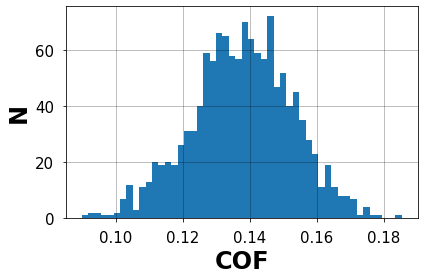

In [31]:
plt.hist(m2575_test['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

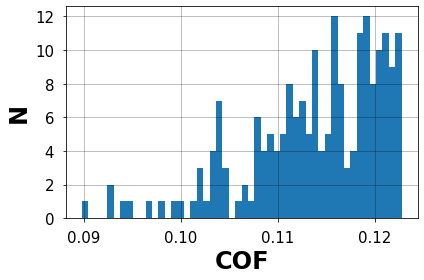

In [32]:
plt.hist(m2575_test.sort_values(by='COF').head(200)['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

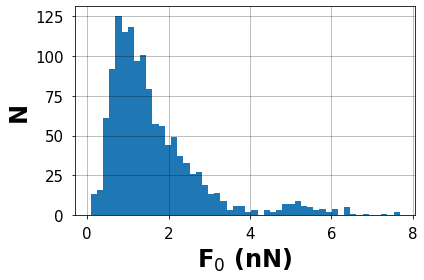

In [33]:
plt.hist(m2575_test['intercept'], bins=50)
plt.xlabel('F$_0$ (nN)')
plt.ylabel('N')
#plt.savefig(fname='./plots/F0_hist.pdf', dpi=500)

Text(0, 0.5, 'N')

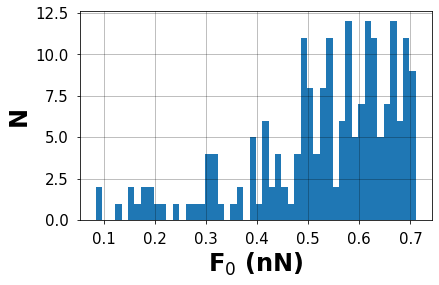

In [34]:
plt.hist(m2575_test.sort_values(by='intercept').head(200)['intercept'], bins=50)
plt.xlabel('F$_0$ (nN)')
plt.ylabel('N')
#plt.savefig(fname='./plots/F0_hist.pdf', dpi=500)